In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Raw_Housing_Prices.csv')

In [ ]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [ ]:
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [ ]:
df['Sale Price'].dropna(how= 'any',inplace = True)

In [ ]:
df['Sale Price'].isnull().sum()

4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

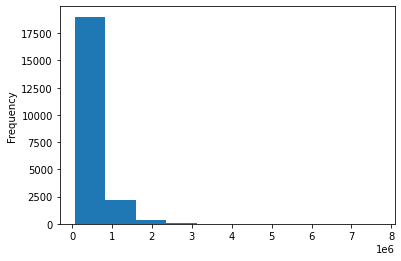

In [ ]:

df['Sale Price'].plot.hist() #Checking distribution of the Sale price

### **Certain outliers found in sale price. Boxplots confirms too**

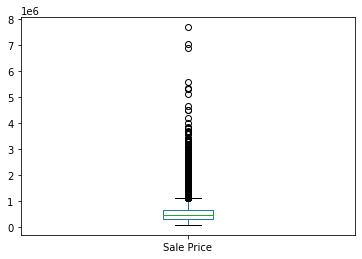

In [ ]:
df['Sale Price'].plot.box()

In [ ]:
#Replacing very high valued outliers with Higher Quratile + 1.5 times of Interquartile range
q25 = df['Sale Price'].quantile(0.25)
q75 = df['Sale Price'].quantile(0.75)
iqr = q75-q25
print(iqr)

323050.0


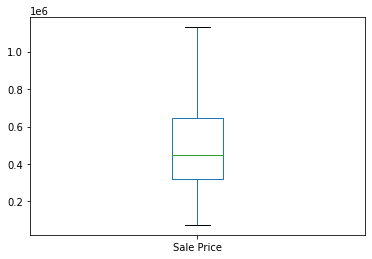

In [ ]:
Upper_bound = q75 + 1.5*iqr
Lower_bound = q25 - 1.5*iqr
def impute(val):
  if val>Upper_bound:
    return Upper_bound
  elif val<Lower_bound:
    return Lower_bound
  else:
    return val  
df['Sale Price'] = df['Sale Price'].apply(impute)
df['Sale Price'].plot.box()

### ***Outliers are removed. Removing missing values of dependent variable by method of imputing ***

In [ ]:
#collecting variables with nan values
nan = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [ ]:
#imputing to remove nan values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df[nan] = imputer.fit_transform(df[nan])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [ ]:
df['No of Times Visited'].value_counts()

None      19489
Twice       963
Thrice      510
Once        332
Four        319
Name: No of Times Visited, dtype: int64

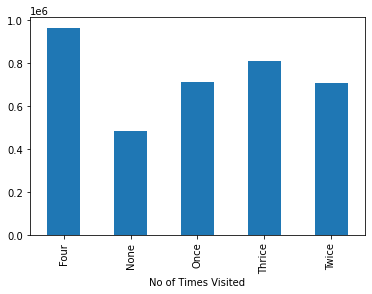

In [ ]:
df.groupby('No of Times Visited')['Sale Price'].mean().plot(kind = 'bar')

In [ ]:
def mapping_Visited(val):
  if val == 'None':
    return 0
  if val == 'Once':
    return 1
  if val == 'Twice':
    return 2
  if val == 'Thrice':
    return 3
  if val == 'Four':
    return 4
df['No of Times Visited'] = df['No of Times Visited'].apply(mapping_Visited)            

In [ ]:
df['No of Times Visited'].head()

0    0
1    0
2    0
3    0
4    0
Name: No of Times Visited, dtype: int64

In [ ]:
def mapping_Waterfront(val):
  if val == 'No':
    return 0
  if val == 'Yes':
    return 1
df['Waterfront View'] = df['Waterfront View'].apply(mapping_Waterfront)      

In [ ]:
df['Waterfront View'].head()

0    0
1    0
2    0
3    0
4    0
Name: Waterfront View, dtype: int64

In [ ]:
df['Zipcode'].value_counts()

98103.0    602
98038.0    590
98115.0    583
98052.0    574
98117.0    553
          ... 
98102.0    105
98010.0    100
98024.0     81
98148.0     57
98039.0     50
Name: Zipcode, Length: 70, dtype: int64

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df['Zipcode'] = imputer.fit_transform(df['Zipcode'].values.reshape(-1,1))

In [ ]:
df['Zipcode'].isnull().sum()

0

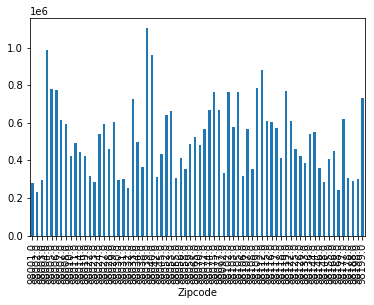

In [ ]:
df.groupby('Zipcode')['Sale Price'].mean().plot(kind = 'bar')

### **Binnig the Zipcode variable in 20 bins so as to facilitate encoding. They are first sorted in the increasing order of sale price which will help generate a better categorical variable** 

In [ ]:
zip = df.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending = True)

In [ ]:
zip['zipcode'] = pd.cut(zip['Sale Price'],bins= 20,labels = range(0,20),include_lowest=True)

In [ ]:
df = pd.merge(df,zip,left_on = 'Zipcode',how = 'left',right_index = True)

In [ ]:
df.head()

,ID,Date House was Sold,Sale Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Sale Price_y,zipcode
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,308435.561069,1
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,462330.404878,5
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,460825.088339,5
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,540466.049430,7
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,666588.201814,9


In [ ]:
df.drop(columns=['Zipcode'],inplace = True)

In [ ]:
df.drop(columns=['Sale Price_y'],inplace = True)

In [ ]:
df['Condition of the House'].value_counts()

Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

### **Encoding Okay and Bad with Fair considering very less no of Okay and Bad counts**

In [ ]:
df['Condition of the House'] = df['Condition of the House'].map({'Bad':1,'Okay':1,'Fair':1,'Good':2,'Excellent':3})

### **Creating a new variable from Renovated_Year in which a year implies the year of renovation and 0 implies renovation was never done.**

In [ ]:

df['Renovated'] = np.where(df['Renovated Year'] == 0, 0, 1)

### **Dropping year of purchase based on the intuition that it cannot effect Sale Price**

In [ ]:
df.drop(columns = ['Date House was Sold'],inplace = True)

In [ ]:
df.drop(columns=['ID'],inplace = True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
Y = df['Sale Price_x']

In [ ]:
X = df.drop(columns = 'Sale Price_x')

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def distribution(data ,var):
  plt.figure(figsize = (len(var)*4,12), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(3,4,j+1)
    plt.hist(data[i])
    plt.title(i)
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)','No of Floors','Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
'Age of House (in Years)', 'Latitude', 'Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']    

In [ ]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

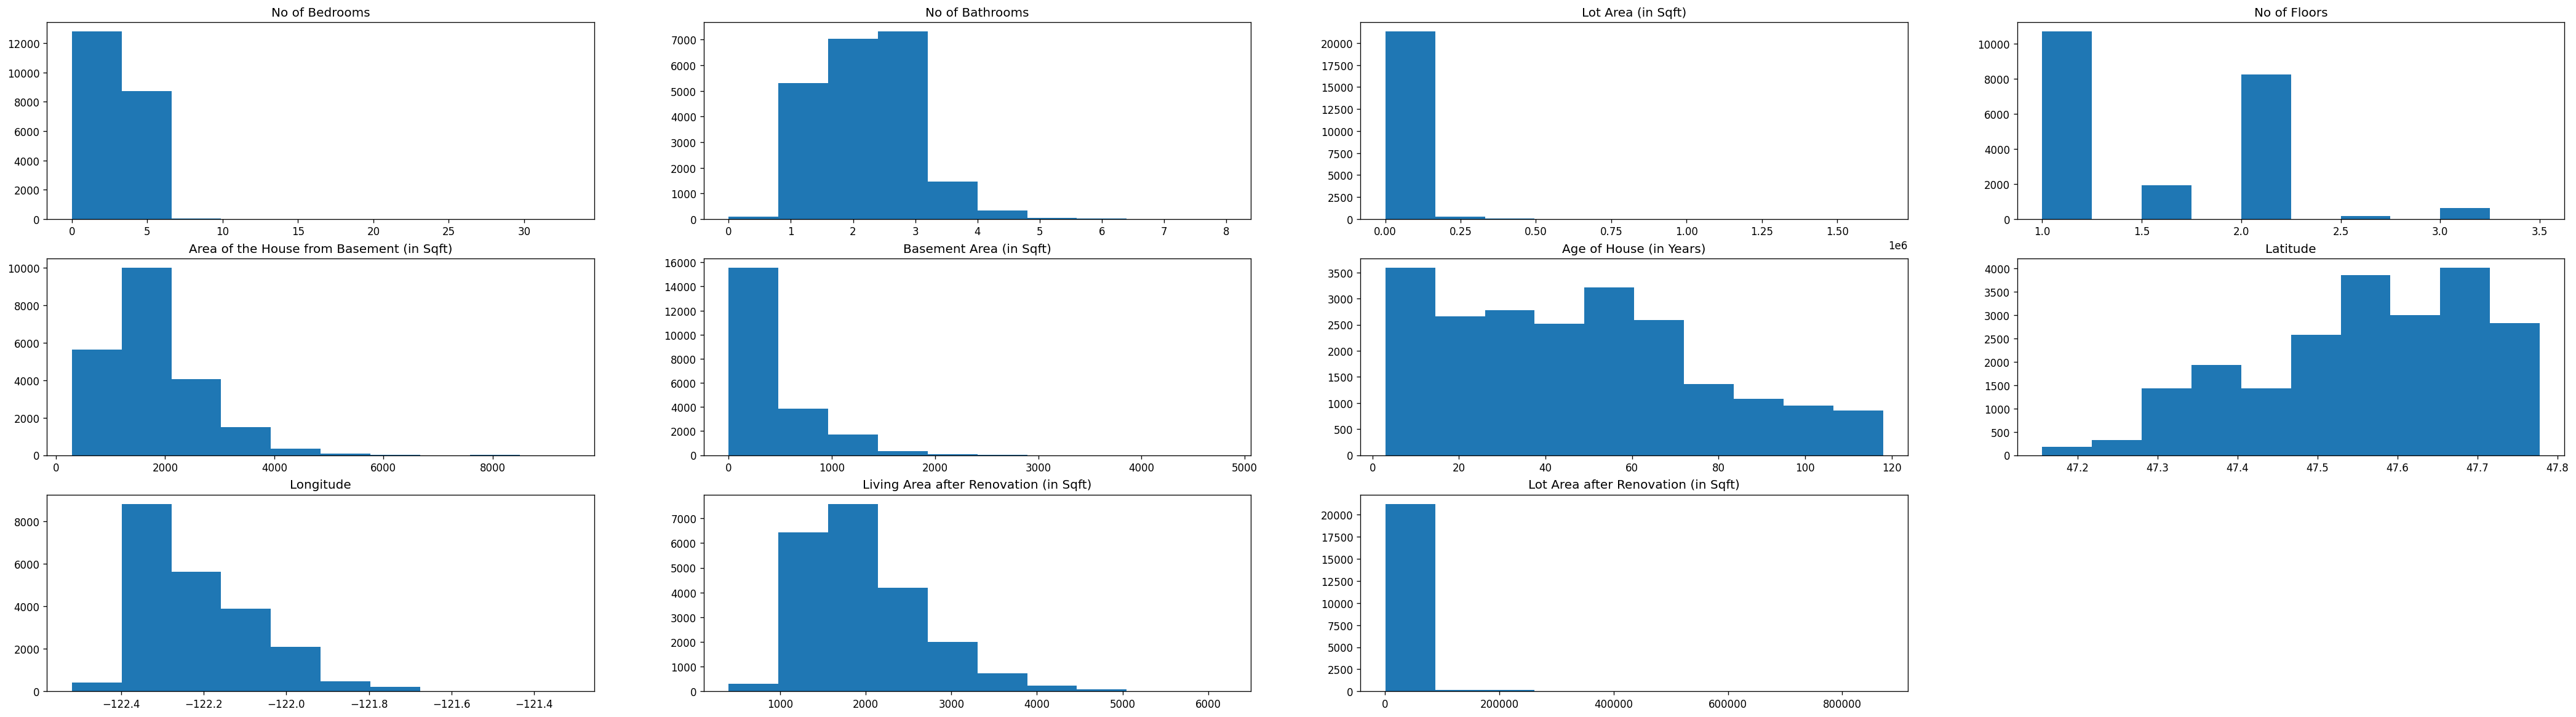

In [ ]:
distribution(X, numerical_columns)

### **Some Variables are right skewed. Their skewness must be removed before training a Linear Regression model**

In [ ]:

def right_skew(x):
  return np.sqrt(abs(x))

skew = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)','No of Floors','Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
'Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)']


In [ ]:
for i in skew:
  X[i] = X[i].map(right_skew)


OverflowError: ignored

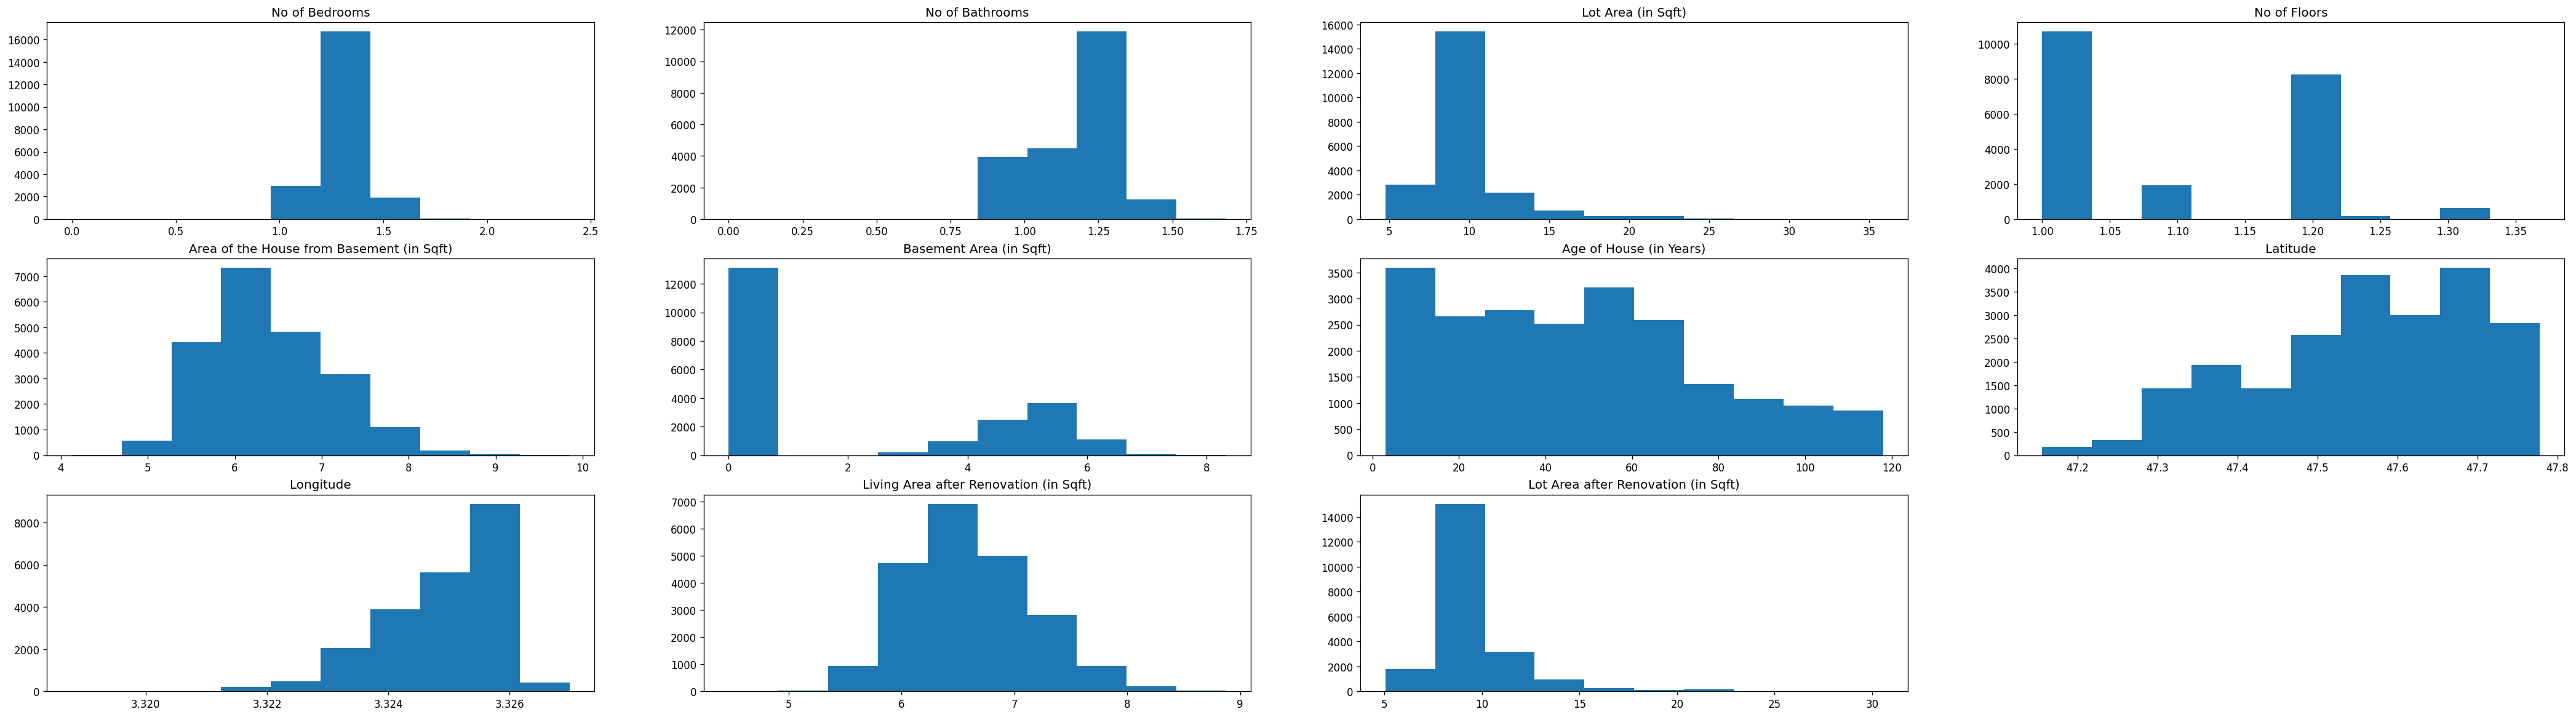

In [ ]:
distribution(X, numerical_columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),zipcode,Renovated
0,-0.290542,-1.622578,-0.979989,-0.411618,-0.951892,-0.087181,-0.30579,-0.663504,-0.563993,-0.760733,-0.789767,0.544734,-0.210149,-0.352572,0.306506,-1.020322,-0.416309,-1.205518,-0.210155
1,-0.290542,0.300277,0.533645,-0.196156,0.993596,-0.087181,-0.30579,-0.663504,-0.563993,0.630049,0.986856,0.680915,4.746219,1.161649,0.746389,-0.358773,-0.114853,-0.221699,4.758385
2,-1.571543,-1.622578,-1.426456,0.104673,-0.951892,-0.087181,-0.30579,-0.663504,-1.468566,-1.616460,-0.789767,1.293731,-0.210149,1.283624,0.136184,1.124123,-0.058550,-0.221699,-0.210155
3,0.700394,1.081664,-0.130612,-0.512885,-0.951892,-0.087181,-0.30579,2.494570,-0.563993,-1.003862,1.392162,0.204281,-0.210149,-0.283284,1.271193,-0.979224,-0.532139,0.270210,-0.210155
4,-0.290542,-0.003774,-0.435516,-0.096787,-0.951892,-0.087181,-0.30579,-0.663504,0.340581,0.019881,-0.789767,-0.544715,-0.210149,0.409591,-1.198877,-0.172277,-0.133451,0.762119,-0.210155


In [ ]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),zipcode,Renovated
No of Bedrooms,1.000000,0.542521,0.555672,0.139778,0.190078,-0.010129,0.069774,0.018336,0.360515,0.507588,0.204728,-0.172430,0.013883,-0.018305,-0.138595,0.399305,0.126356,0.108568,0.013569
No of Bathrooms,0.542521,1.000000,0.707088,0.098793,0.499728,0.050887,0.161584,-0.132634,0.629182,0.671987,0.206323,-0.518254,0.043784,0.015311,-0.228087,0.559844,0.090268,0.214328,0.043314
Flat Area (in Sqft),0.555672,0.707088,1.000000,0.320099,0.373138,0.103835,0.284656,-0.073835,0.705733,0.856138,0.280983,-0.318196,0.055364,0.052547,-0.240017,0.741196,0.301026,0.296743,0.055095
Lot Area (in Sqft),0.139778,0.098793,0.320099,1.000000,-0.142477,0.066316,0.115846,0.052052,0.167042,0.302818,-0.009455,-0.030803,0.020743,-0.134596,-0.364356,0.328669,0.899796,-0.035772,0.020931
No of Floors,0.190078,0.499728,0.373138,-0.142477,1.000000,0.024113,0.029124,-0.279925,0.470174,0.571625,-0.273298,-0.479953,0.010323,0.041187,-0.142564,0.298272,-0.142035,0.152357,0.010242
Waterfront View,-0.010129,0.050887,0.103835,0.066316,0.024113,1.000000,0.401856,0.018165,0.070332,0.063793,0.048629,0.026149,0.092882,-0.014274,0.041911,0.080936,0.076275,0.015006,0.093291
No of Times Visited,0.069774,0.161584,0.284656,0.115846,0.029124,0.401856,1.000000,0.045018,0.223661,0.161709,0.214035,0.053395,0.103907,0.006163,0.078410,0.269378,0.112502,0.097316,0.104051
Condition of the House,0.018336,-0.132634,-0.073835,0.052052,-0.279925,0.018165,0.045018,1.000000,-0.167649,-0.171509,0.156212,0.386677,-0.063702,-0.018053,0.113049,-0.101916,0.058111,0.038739,-0.063195
Overall Grade,0.360515,0.629182,0.705733,0.167042,0.470174,0.070332,0.223661,-0.167649,1.000000,0.723630,0.077160,-0.456711,0.010436,0.111228,-0.201664,0.677501,0.166743,0.373459,0.010010
Area of the House from Basement (in Sqft),0.507588,0.671987,0.856138,0.302818,0.571625,0.063793,0.161709,-0.171509,0.723630,1.000000,-0.177541,-0.447883,0.025932,-0.014419,-0.359285,0.721375,0.288366,0.230004,0.025825


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xtemp = X[:]
VIF = pd.Series([variance_inflation_factor(Xtemp.values, i) for i in range(Xtemp.shape[1])], index = Xtemp.columns)
VIF

No of Bedrooms                                   1.724068
No of Bathrooms                                  3.247687
Flat Area (in Sqft)                             14.720892
Lot Area (in Sqft)                               5.544930
No of Floors                                     2.258558
Waterfront View                                  1.208979
No of Times Visited                              1.402876
Condition of the House                           1.287548
Overall Grade                                    3.053582
Area of the House from Basement (in Sqft)       18.518066
Basement Area (in Sqft)                          4.518831
Age of House (in Years)                          2.524446
Renovated Year                               16134.893395
Latitude                                         1.592171
Longitude                                        1.619815
Living Area after Renovation (in Sqft)           2.959848
Lot Area after Renovation (in Sqft)              5.461541
zipcode       

In [ ]:
X.drop(columns=['Renovated Year'],inplace=True)

In [ ]:
Xtemp = X[:]
VIF = pd.Series([variance_inflation_factor(Xtemp.values, i) for i in range(Xtemp.shape[1])], index = Xtemp.columns)
VIF

No of Bedrooms                                1.723357
No of Bathrooms                               3.242959
Flat Area (in Sqft)                          14.707915
Lot Area (in Sqft)                            5.542461
No of Floors                                  2.257385
Waterfront View                               1.206519
No of Times Visited                           1.402757
Condition of the House                        1.282102
Overall Grade                                 3.046941
Area of the House from Basement (in Sqft)    18.493152
Basement Area (in Sqft)                       4.517499
Age of House (in Years)                       2.524325
Latitude                                      1.591642
Longitude                                     1.619814
Living Area after Renovation (in Sqft)        2.957421
Lot Area after Renovation (in Sqft)           5.460409
zipcode                                       1.933074
Renovated                                     1.158481
dtype: flo

In [ ]:
X.drop(columns=['Area of the House from Basement (in Sqft)'],inplace=True)

In [ ]:
Xtemp = X[:]
VIF = pd.Series([variance_inflation_factor(Xtemp.values, i) for i in range(Xtemp.shape[1])], index = Xtemp.columns)
VIF

No of Bedrooms                            1.645565
No of Bathrooms                           3.182698
Flat Area (in Sqft)                       4.295277
Lot Area (in Sqft)                        5.535699
No of Floors                              2.104479
Waterfront View                           1.206269
No of Times Visited                       1.395010
Condition of the House                    1.281879
Overall Grade                             2.897137
Basement Area (in Sqft)                   1.665182
Age of House (in Years)                   2.519808
Latitude                                  1.591489
Longitude                                 1.613741
Living Area after Renovation (in Sqft)    2.870185
Lot Area after Renovation (in Sqft)       5.460009
zipcode                                   1.923235
Renovated                                 1.158208
dtype: float64

In [ ]:
X.drop(columns=['Lot Area (in Sqft)'],inplace=True)

In [ ]:
Xtemp = X[:]
VIF = pd.Series([variance_inflation_factor(Xtemp.values, i) for i in range(Xtemp.shape[1])], index = Xtemp.columns)
VIF

No of Bedrooms                            1.645178
No of Bathrooms                           3.182478
Flat Area (in Sqft)                       4.209831
No of Floors                              2.089279
Waterfront View                           1.205900
No of Times Visited                       1.394589
Condition of the House                    1.280717
Overall Grade                             2.895625
Basement Area (in Sqft)                   1.659585
Age of House (in Years)                   2.498287
Latitude                                  1.591380
Longitude                                 1.596073
Living Area after Renovation (in Sqft)    2.863521
Lot Area after Renovation (in Sqft)       1.502298
zipcode                                   1.914719
Renovated                                 1.157756
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split as spl
x_train, x_test, y_train, y_test = spl(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 16), (6483, 16), (15126,), (6483,))

In [ ]:
from sklearn.linear_model import LinearRegression as LR
lr = LR(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
lr.score(x_test, y_test)

0.8446962953716177

In [ ]:
predictions = lr.predict()
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')